In [7]:
import sys
print(sys.path)

['C:\\Guenther.T\\src\\gimli\\notebooks\\inversion', 'C:\\Program Files\\software\\Anaconda\\python39.zip', 'C:\\Program Files\\software\\Anaconda\\DLLs', 'C:\\Program Files\\software\\Anaconda\\lib', 'C:\\Program Files\\software\\Anaconda', '', 'C:\\Guenther.T\\Anwendungsdaten\\Python\\Python39\\site-packages', 'C:\\Program Files\\software\\Anaconda\\lib\\site-packages', 'C:\\Program Files\\software\\Anaconda\\lib\\site-packages\\win32', 'C:\\Program Files\\software\\Anaconda\\lib\\site-packages\\win32\\lib', 'C:\\Program Files\\software\\Anaconda\\lib\\site-packages\\Pythonwin', 'C:\\Program Files\\software\\Anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Guenther.T\\.ipython']


In [8]:
newp = r'c:\\Guenther.T\\src\\gimli\\gimli'
sys.path.append(newp)

In [9]:
import numpy as np
import pygimli as pg
from pygimli.frameworks.lsqrinversion import LSQRInversion
from pygimli.physics.ert import VESModelling

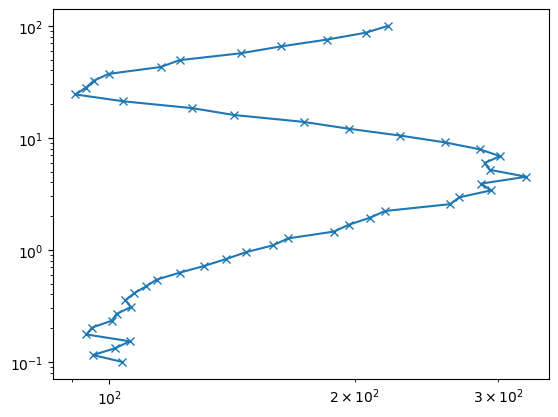

In [10]:
nlay = 4  # number of layers
lam = 200.  # (initial) regularization parameter
errPerc = 3.  # relative error of 3 percent
ab2 = np.logspace(-1, 2, 50)  # AB/2 distance (current electrodes)
mn2 = ab2 / 3.  # MN/2 distance (potential electrodes)
f = VESModelling(ab2=ab2, mn2=mn2, nLayers=nlay)
synres = [100., 500., 20., 800.]  # synthetic resistivity
synthk = [0.5, 3.5, 6.]  # synthetic thickness (nlay-th layer is infinite)
rhoa = f(synthk+synres)
rhoa = rhoa * (pg.randn(len(rhoa)) * errPerc / 100. + 1.)
pg.plt.loglog(rhoa, ab2, "x-")

In [11]:
tLog = pg.trans.TransLog()
inv = LSQRInversion(fop=f, verbose=True)
inv.LSQRiter = 20
# inv = pg.Inversion(fop=f)
inv.dataTrans = tLog
inv.modelTrans = tLog
startModel = pg.cat(pg.Vector(nlay-1, 8), pg.Vector(nlay, pg.median(rhoa)))
inv.inv.setMarquardtScheme()
model1 = inv.run(rhoa, pg.Vector(len(rhoa), errPerc/100), lam=1000, startModel=startModel)
print(model1)
print(inv.chi2(), inv.relrms(), pg.sum(inv.model[:nlay-1]))
G = pg.Matrix(rows=1, cols=len(startModel))
for i in range(3):
    G.setVal(0, i, 1)

c = pg.Vector(1, pg.sum(synthk))
inv.setParameterConstraints(G, c, 100)
model2 = inv.run(rhoa, pg.Vector(len(rhoa), errPerc/100), lam=1000, startModel=startModel)
print(model2)
print(inv.chi2(), inv.relrms(), pg.sum(inv.model[:nlay-1]))

04/01/23 - 13:44:30 - pyGIMLi - INFO - Starting inversion.
04/01/23 - 13:44:30 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


fop: <pygimli.physics.ert.ves.VESModelling object at 0x000002408DABEA40>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x0000024128981590>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000024128922F40>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000024128922F40>
min/max (data): 90.86/325
min/max (error): 3%/3%
min/max (start model): 8/144
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 176.04 (dPhi = 5.89%) lam: 1000
--------------------------------------------------------------------------------
inv.iter 2 ... 

04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 172.24 (dPhi = 2.16%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 168.64 (dPhi = 2.09%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 154.5 (dPhi = 8.38%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 5 ... 

04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 133.4 (dPhi = 13.65%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 6 ... chi² = 66.87 (dPhi = 49.87%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 7 ... chi² = 15.8 (dPhi = 76.38%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 8 ... 

04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:31 - pyGIMLi - INFO - Starting inversion.
04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 2.15 (dPhi = 86.37%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 9 ... chi² = 1.23 (dPhi = 43.04%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 10 ... chi² = 1.2 (dPhi = 1.72%) lam: 1000.0
################################################################################
#                 Abort criteria reached: dPhi = 1.72 (< 2.0%)                 #
################################################################################
7 [0.5062387759297691, 3.4257254403873723, 8.915935752931874, 99.9251353826211, 500.35706847907045, 29.41669052451971, 889.9163181659392]
1.2048571942395458 3.3173789816793664 12.847899969249015
fop: <pygimli.physics.ert.ves.VESModelling object at 0x000002408DABEA40>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x0000024128981590>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000024128910880>


04/01/23 - 13:44:31 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 169.75 (dPhi = 9.25%) lam: 1000
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 165.64 (dPhi = 2.43%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 145.32 (dPhi = 12.27%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 80.74 (dPhi = 44.44%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 26.78 (dPhi = 66.84%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 6 ... 

04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build
04/01/23 - 13:44:32 - pyGIMLi - WARNING - Multiprocess jacobian currently unavailable for win build


chi² = 4.72 (dPhi = 82.37%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 7 ... chi² = 1.28 (dPhi = 72.9%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 8 ... chi² = 1.2 (dPhi = 6.28%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 9 ... chi² = 1.19 (dPhi = 0.34%) lam: 1000.0
################################################################################
#                 Abort criteria reached: dPhi = 0.34 (< 2.0%)                 #
################################################################################
7 [0.5032707095434893, 3.5727121928969727, 5.92389413209304, 99.89457575784952, 492.99258639642846, 19.66671719267003, 876.838494526287]
1.1949891184139765 3.3012203092651453 9.999877034533501


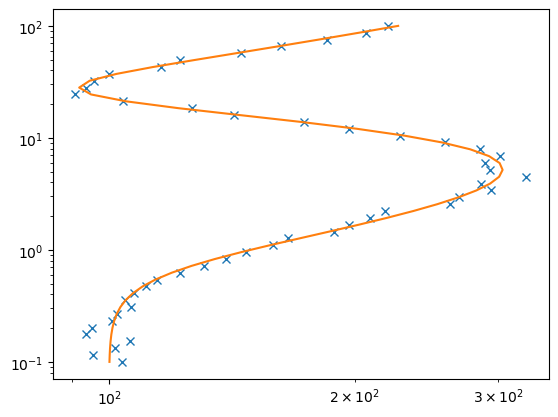

In [12]:
# model response
fig, ax = pg.plt.subplots()
ax.loglog(rhoa, ab2, "x")
ax.loglog(inv.response, ab2, "-")

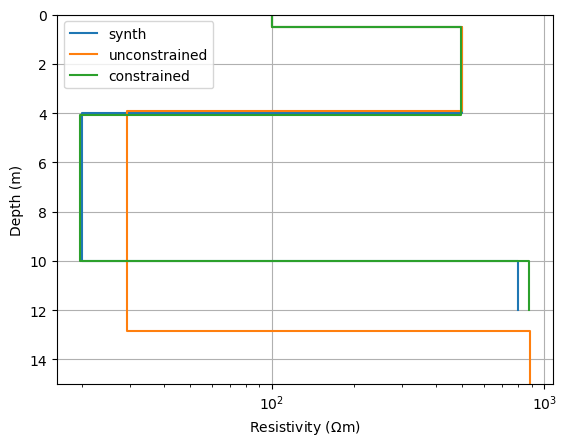

In [13]:
# the models
fig, ax = pg.plt.subplots()
pg.viewer.mpl.drawModel1D(ax, synthk, synres, plot="semilogx", label="synth")
pg.viewer.mpl.drawModel1D(ax, model=model1, label="unconstrained")
pg.viewer.mpl.drawModel1D(ax, model=model2, label="constrained")
ax.set_ylim(15, 0)
ax.grid(True)
ax.legend();